In [ ]:
!pip install --quiet openai langchain-core langchain-google-vertexai

In [1]:
import os
from datetime import datetime
from typing import Tuple
from IPython.display import display
from IPython.display import Markdown
import textwrap

from google.cloud import aiplatform

# Get the default cloud project id.
PROJECT_ID = os.environ["GOOGLE_CLOUD_PROJECT"]

# Get the default region for launching jobs.
REGION = os.environ["GOOGLE_CLOUD_REGION"]

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
#PROJECT_ID = "jkwng-vertex-playground"
#REGION = "us-central1"

system_prompt = "You are a philosophical question answering bot asked to answer questions about the future.  Answer in one or two short sentences." # @param {type: "string"}
prompt = "How would the Future of AI in 10 Years look?"  # @param {type: "string"}
max_tokens = 256  # @param {type:"integer"}
temperature = 1.0  # @param {type:"number"}
top_p = 0.9  # @param {type:"number"}
top_k = 1  # @param {type:"integer"}


# Gemini via Vertex AI

## Gemini 1.5 Pro Text-to-Text

In [4]:
import vertexai
from vertexai.generative_models import GenerativeModel, Part, FinishReason
import vertexai.preview.generative_models as generative_models


generation_config = {
    "max_output_tokens": max_tokens,
    "temperature": temperature,
    "top_p": top_p,
}

safety_settings = {
    generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_NONE,
    generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_NONE,
    generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_NONE,
    generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_NONE,
}

vertexai.init(project=PROJECT_ID, location=REGION)
model = GenerativeModel(
  "gemini-1.5-pro-002",
  #system_instruction=system_prompt,
)


In [ ]:
responses = model.generate_content(
    [prompt],
    generation_config=generation_config,
    safety_settings=safety_settings
)


to_markdown(responses.text)


> Predicting the future is always tricky, but based on current trends, here's a plausible look at AI in 10 years (2034):
> 
> **More Integrated and Invisible AI:**
> 
> * **Ubiquitous Assistants:**  AI assistants will be far more proactive and integrated into our lives, anticipating needs rather than just reacting to commands. They'll manage schedules, filter information overload, personalize education and entertainment, and even offer emotional support.  Think less "Hey Siri" and more seamless integration into our devices and environments.
> * **AI-Powered Automation:** Many routine tasks across various industries will be automated, from customer service and data entry to manufacturing and logistics. This will lead to increased efficiency and potentially job displacement in some sectors, while creating new roles in AI-related fields.
> * **Personalized Experiences:**  AI will personalize everything from shopping recommendations and news feeds to medical treatments and fitness plans. This hyper-personalization could lead to both enhanced user experiences and increased privacy concerns.
> 
> **Advanced Capabilities:**
> 
> * **Improved Natural Language Processing (NLP):** We'll see more natural and nuanced conversations with AI.  Machines will better understand context, humor, and emotion, leading to more sophisticated chatbots, virtual assistants, and language translation

In [ ]:
print(responses)

candidates {
  content {
    role: "model"
    parts {
      text: "In 10 years, AI will likely be deeply integrated into daily life, automating mundane tasks and augmenting human capabilities.  However,  ethical concerns around bias, job displacement, and autonomous decision-making will require careful consideration and regulation. \n"
    }
  }
  finish_reason: STOP
  safety_ratings {
    category: HARM_CATEGORY_HATE_SPEECH
    probability: NEGLIGIBLE
    probability_score: 0.0260009765625
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.042724609375
  }
  safety_ratings {
    category: HARM_CATEGORY_DANGEROUS_CONTENT
    probability: NEGLIGIBLE
    probability_score: 0.040283203125
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.09033203125
  }
  safety_ratings {
    category: HARM_CATEGORY_HARASSMENT
    probability: NEGLIGIBLE
    probability_score: 0.046142578125
    severity: HARM_SEVERITY_NEGLIGIBLE
    severity_score: 0.046630859375
  }
  safety_rating

## Streaming response

In [ ]:
responses = model.generate_content(
    [prompt],
    generation_config=generation_config,
    safety_settings=safety_settings,
    stream=True,
)

for response in responses:
  print(response.text)

In
 10 years, AI will likely be deeply integrated into daily life, automating
 mundane tasks and augmenting human capabilities.  However,  fundamental questions around consciousness
 and ethical implications will remain a source of debate and research.




## Gemini 1.5 Flash via Vertex AI

In [ ]:
model = GenerativeModel(
  "gemini-1.5-flash-002",
  #system_instruction=system_prompt,
)
responses = model.generate_content(
    [prompt],
    generation_config=generation_config,
    safety_settings=safety_settings,
    stream=True,
)

for response in responses:
  print(response.text)

Predic
ting the future of AI in 10 years is challenging, but based on
 current trends, we can anticipate several significant developments:

**Increased Capabilities and Integration
:**

* **More sophisticated AI models:** We'll see advancements in deep learning, leading to AI systems capable of more complex reasoning, problem-solving,
 and creativity.  Models will be significantly larger and more computationally efficient.
* **Multimodal AI:** AI will seamlessly integrate different modalities like text, images,
 audio, and video, leading to a more holistic understanding of the world and richer user experiences.  Imagine AI that understands a scene in a video as well as a human does.
* **Enhanced Natural Language Processing (NLP):**  
AI will understand and generate human language with greater nuance, context, and emotional intelligence.  Expect more sophisticated chatbots, AI writing assistants, and translation tools.
* **Personalized AI experiences:** AI will be deeply personalized, a

## Gemini 1.5 Flash Text via OpenAI API

Vertex AI also makes an OpenAI compatible endpoint in case you have written client code directly against OpenAI's SDK.

In [ ]:
import openai

from google.auth import default, transport

# Programmatically get an access token
credentials, _ = default(scopes=["https://www.googleapis.com/auth/cloud-platform"])
auth_request = transport.requests.Request()
credentials.refresh(auth_request)

# OpenAI Client
client = openai.OpenAI(
    base_url=f"https://{REGION}-aiplatform.googleapis.com/v1beta1/projects/{PROJECT_ID}/locations/{REGION}/endpoints/openapi",
    api_key=credentials.token,
)

response = client.chat.completions.create(
    model="google/gemini-1.5-flash-002",
    messages=[
        {
            "role": "system",
            "content": [
                {
                  "type": "text",
                  "text": system_prompt,
                }
            ],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": prompt
                },
            ],
        }
    ],
    stream=True,
)
for chunk in response:
    print(chunk.choices[0].delta.content)

AI
 will be more integrated into daily life, assisting in various tasks and potentially exhibiting more
 advanced reasoning capabilities, though likely still short of human-level general intelligence.  
Ethical considerations and regulations will be paramount.




## Structured Generation



In [ ]:
from vertexai.generative_models import GenerationConfig

response_schema = {
    "type": "array",
    "items": {
        "type": "object",
        "properties": {
            "recipe_name": {
                "type": "string",
            },
        },
        "required": ["recipe_name"],
    },
}

generation_config = GenerationConfig(
    response_mime_type="application/json",
    response_schema=response_schema,
)

model = GenerativeModel(
  "gemini-1.5-pro-002",
)
responses = model.generate_content(
    [prompt],
    generation_config=generation_config,
    safety_settings=safety_settings,
)

json_obj = json.loads(responses.candidates[0].content.text)
print(json.dumps(json_obj, indent=2))

[
  {
    "recipe_name": "AI-Powered Personalized Education"
  },
  {
    "recipe_name": "AI-Driven Drug Discovery and Development"
  },
  {
    "recipe_name": "AI-Enhanced Cybersecurity"
  },
  {
    "recipe_name": "AI-Powered Climate Change Mitigation"
  },
  {
    "recipe_name": "AI in Autonomous Transportation"
  },
  {
    "recipe_name": "AI-Driven Personalized Healthcare"
  },
  {
    "recipe_name": "AI in Creative Arts and Entertainment"
  },
  {
    "recipe_name": "AI-Powered Smart Cities"
  },
  {
    "recipe_name": "AI in Robotics and Automation"
  },
  {
    "recipe_name": "Explainable and Ethical AI"
  }
]


## Function Calling

# Llama 3.1 Text via Vertex AI Model Garden (MaaS)

Vertex AI also has an API service available for Meta's Llama 3 models so you can use them without having to manage the infrastructure yourself.  Llama 3.1 API service uses the OpenAPI chat completions API.  We can use the same OpenAI API above we used to call Gemini to call Llama 3.1 405B.

In [ ]:
response = client.chat.completions.create(
    model="meta/llama3-405b-instruct-maas",
    messages=[
        {
            "role": "system",
            "content": [
                {
                  "type": "text",
                  "text": system_prompt,
                }
            ],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": prompt
                },
            ],
        }
    ],
    stream=True,
)

for chunk in response:
    print(chunk.choices[0].delta.content)

In 10 years, AI is likely to be deeply integrated into daily life,
 transforming industries such as healthcare, finance, and education with increased autonomy and sophisticated decision
-making capabilities. Humans and AI systems may collaborate seamlessly, leading to unprecedented levels of
 innovation and productivity.



# Vertex AI via Langchain

Langchain also has extensions to call Vertex AI.  Note you can also use the `ChatOpenAI` class above with the `base_url` to call Gemini via the OpenAI compatible endpoint as well.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_vertexai import VertexAI

# To use model
llm = VertexAI(model_name="gemini-1.5-pro-002", safety_settings=safety_settings)

prompt_template = ChatPromptTemplate.from_messages([
  ("system", system_prompt),
  ("user", "{input}"),
])

chain = prompt_template | llm
to_markdown(chain.invoke({"input": prompt}))

> In 10 years, AI will likely be deeply integrated into daily life, automating mundane tasks and augmenting human capabilities.  However, crucial questions of ethical oversight and equitable access will still be actively debated and shaped.


# Multimodal input

## Multimodal input via Vertex AI SDK

In [6]:
image_prompt = "What is happening in the image?"  # @param {type: "string"}
bucket = "jkwng-vertex-experiments"  # @param {type: "string"}
path = "sports/basketball/00000096.jpg"  # @param {type: "string"}
max_tokens = 256  # @param {type:"integer"}
temperature = 1.0  # @param {type:"number"}
top_p = 0.9  # @param {type:"number"}
top_k = 1  # @param {type:"integer"}

### Gemini 1.5 pro

Gemini 1.5 pro is natively multi-modal, and can be used for text, image, video, and audio understanding.

Downloaded blob sports/basketball/00000096.jpg from bucket jkwng-vertex-experiments as bytes


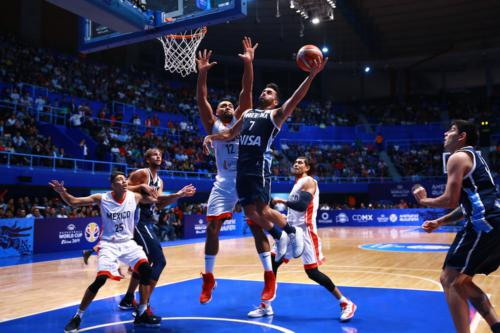

In [7]:
# prompt: download image from blob into bytes

from google.cloud import storage
from IPython.display import Image as DisplayImage

storage_client = storage.Client()

def download_blob_as_bytes(bucket_name, blob_name):
    """Downloads a blob from the bucket."""
    # bucket_name = "your-bucket-name"
    # blob_name = "your-object-name"

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(blob_name)
    contents_bytes = blob.download_as_bytes()

    print(
        "Downloaded blob {} from bucket {} as bytes".format(
            blob_name, bucket_name
        )
    )
    return contents_bytes

image_bytes = download_blob_as_bytes(bucket, path)
display(DisplayImage(image_bytes))

In [ ]:
image_file = Part.from_uri(
    f"gs://{bucket}/{path}", "image/jpeg"
)

model = GenerativeModel(
  "gemini-1.5-pro-002",
)

# Query the model
response = model.generate_content([image_file, image_prompt])
to_markdown(response.text)

> The image captures a dynamic scene during a basketball game. A player wearing a blue jersey with the number 7 and "VISA" written on it is in mid-air, having just shot the ball.  He's the focus of the action.  Two of his teammates are also in the frame, one of whom is closely guarding an opponent in a white jersey with "MEXICO" and the number 25. Another opponent in a red jersey is watching the shot.  A fourth player in a dark blue jersey is on the right side of the image, seemingly reacting to the play.  The background shows a large, modern indoor stadium with spectators, scoreboards, and various advertisements. It appears to be a professional game given the setting and intensity of the moment captured.

## Multimodal input via OpenAI SDK

### Llama 3.2

Llama 3.2 is an open weight multi-modal variant of Llama that can be used for image understanding, which is also consumable as a service using Vertex AI Model-as-a-service.

In [ ]:
response = client.chat.completions.create(
    model="meta/llama-3.2-90b-vision-instruct-maas",
    messages=[

        {
            "role": "user",
            "content": [
                {"image_url": {"url": f"gs://{bucket}/{path}"}, "type": "image_url"},
                {
                    "type": "text",
                    "text": image_prompt
                },
            ],
        }
    ],
)

to_markdown(response.choices[0].message.content)

> The image depicts a basketball game in progress, with players from both teams actively engaged on the court. The scene is set against a backdrop of a packed stadium, where spectators are seated and watching the game intently.
> 
> **Key Elements:**
> 
> * A basketball player in a black uniform is attempting to score by jumping up and reaching for the hoop.
> * Another player in a white uniform is trying to block the shot.
> * Other players are positioned around the court, some of whom appear to be moving towards the action or reacting to it.
> * The court itself features a blue floor with white lines, and the hoop is visible at the top of the image.
> * In the background, the stands are filled with people watching the game, creating an energetic atmosphere.
> 
> **Conclusion:**
> Based on the visual information presented, it can be inferred that the image captures a moment of intense competition during a basketball game. The players' actions and the crowd's presence suggest a high level of excitement and engagement.

# Embeddings models

## Text Embeddings

If generating embeddings for mostly english text, you can use the `text-embedding-004` model. For non-English text, there is a multi-lingual embeddings model `text-multilingual-embedding-002`.

Here we will retrieve the embeddings for both of the responses above and calculate the embeddings for both.

In [ ]:
from vertexai.language_models import TextEmbeddingModel

messages = [
    {
        "role": "system",
        "content": [
            {
              "type": "text",
              "text": system_prompt,
            }
        ],
    },
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": prompt
            },
        ],
    }
]

gemini_resp = client.chat.completions.create(
    model="google/gemini-1.5-pro-002",
    messages=messages,
    max_completion_tokens=max_tokens,
    temperature=temperature,
    top_p=top_p,
    stream=False,
)
gemini_resp_str = gemini_resp.choices[0].message.content
to_markdown(f"Gemini response: {gemini_resp_str}")




> Gemini response: In 10 years, AI will likely be deeply integrated into daily life, automating mundane tasks and augmenting human capabilities.  However, ethical concerns around bias, job displacement, and autonomous decision-making will require careful consideration.


In [ ]:
llama_resp = client.chat.completions.create(
    model="meta/llama3-405b-instruct-maas",
    messages=messages,
    max_completion_tokens=max_tokens,
    temperature=temperature,
    top_p=top_p,
    stream=False,
)
llama_resp_str = llama_resp.choices[0].message.content
to_markdown(f"Llama response: {llama_resp_str}")

> Llama response: In 10 years, AI is expected to be deeply integrated into daily life, transforming industries such as healthcare, finance, and transportation with increased autonomy and human-AI collaboration. Advances in natural language processing, computer vision, and machine learning will likely lead to more sophisticated and human-like AI interactions.

In [ ]:
model = TextEmbeddingModel.from_pretrained("text-embedding-004")
embeddings = model.get_embeddings(
     texts=[
         gemini_resp_str,
         llama_resp_str,
     ],
)

embeddings = [embedding.values for embedding in embeddings]

print(embeddings)

[[0.028578810393810272, 0.01871803030371666, 0.010461695492267609, 0.020793987438082695, -0.0646403357386589, 0.041559722274541855, -0.0012230802094563842, 0.0270688496530056, 0.0032663801684975624, 0.003664738032966852, -0.04069408029317856, 0.05282213166356087, 0.020665809512138367, 0.05943065136671066, -0.023137005046010017, 0.0045309048146009445, -0.011483638547360897, 0.05149185284972191, -0.052381742745637894, -0.01067932229489088, -0.06328552216291428, 0.04053576663136482, -0.005438573658466339, -0.03069956973195076, 0.008832676336169243, -0.053684674203395844, 0.04665673151612282, 0.0022688619792461395, 0.00959881953895092, 0.0018617539899423718, -0.0377688892185688, 0.021558484062552452, 0.014746168628334999, -0.0049739922396838665, -0.023599043488502502, -0.029152797535061836, 0.003103381022810936, -0.017293209210038185, -0.023166261613368988, -0.017812570556998253, -0.0462355874478817, -0.06521446257829666, 0.022640183568000793, 0.04826238006353378, -0.041586797684431076, 0.

In [ ]:
import numpy as np

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print(f"Cosine similarity between Gemini and Llama: {cosine_similarity(embeddings[0], embeddings[1])}")

Cosine similarity between Gemini and Llama: 0.8873307031556693


## Multimodal Embeddings

Submit request for embeddings for our image above.

In [11]:
from vertexai.vision_models import Image, MultiModalEmbeddingModel

mm_embed_model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding@001")
image = Image.load_from_file(
    f"gs://{bucket}/{path}"
)

embeddings = mm_embed_model.get_embeddings(
     image=image,
     dimension=1408,
)

print(embeddings.image_embedding)

[-0.0307535902, 0.0663451478, 0.00039965121, -0.0133614717, -0.01158523, 0.00956290495, -0.0148635954, 0.00991722289, -0.00952775404, 0.0216662288, -0.00184198271, -0.00692347856, -0.00209274306, 0.0239845589, -0.0241318792, 0.00888424087, 0.0213088058, 0.00298213074, -0.0152266948, 0.00573292421, -0.0654595494, -0.00254638889, -0.0256708227, 0.0325338282, 0.0139670465, -0.00856351107, 0.00459125685, -0.04984257, -0.00347612891, -0.0140422843, 0.00258276798, -0.00690976065, 0.00356700318, 0.00684762839, -0.0202094503, 0.0328759812, 0.0267247576, -0.00220636488, -0.0146312425, -0.0317490846, -0.0412844643, -0.0162757412, -0.00632089889, 0.00376184424, -0.0366866142, -0.024912104, 0.00494088698, -0.0063445284, 0.0419526212, 0.0298118033, 0.0360693522, 0.0294797942, 0.0130343111, 0.020901246, -0.000886910362, -0.0126485471, 0.048061803, 0.0250173137, -0.04048305, -0.0258590877, -0.0162841193, -0.0504531749, -0.0019534335, -0.0186721161, -0.000216234956, -0.0397800058, -0.0255563837, -0.05

# Vector Index using Vertex AI Vector Search

Generate the embeddings for my pokemon images dataset. (you don't need to do this more than once)

In [8]:
import json

In [ ]:
# Note: Client.list_blobs requires at least package version 1.17.0.
blobs = storage_client.list_blobs(bucket, prefix="pokemon/images/")

count = 0
file_idx = 0
output = storage_client.bucket(bucket).blob(f"pokemon/embeddings/embeddings-{str(file_idx).zfill(5)}.json")

for blob in blobs:
  if not blob.name.endswith(".jpg"):
    continue

  if count % 1000 == 0:
    if f is not None:
      f.close()

    file_idx += 1
    print(f"started file: pokemon/embeddings/embeddings-{str(file_idx).zfill(5)}.json")

    output = storage_client.bucket(bucket).blob(f"pokemon/embeddings/embeddings-{str(file_idx).zfill(5)}.json")
    f = output.open("w")

  image = Image.load_from_file(
      f"gs://{bucket}/{blob.name}"
  )

  embedding = model.get_embeddings(image=image, dimension=1408)
  f.write(json.dumps({
      "embedding": embedding.image_embedding,
      "id": blob.name,
  }))
  f.write("\n")

  count += 1
  if count % 100 == 0:
    print(f"Processed {count} images")






started file: pokemon/embeddings-00001.json
Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processed 1000 images
started file: pokemon/embeddings-00002.json
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images
Processed 1500 images
Processed 1600 images
Processed 1700 images
Processed 1800 images
Processed 1900 images
Processed 2000 images
started file: pokemon/embeddings-00003.json
Processed 2100 images
Processed 2200 images
Processed 2300 images
Processed 2400 images
Processed 2500 images
Processed 2600 images
Processed 2700 images
Processed 2800 images
Processed 2900 images
Processed 3000 images
started file: pokemon/embeddings-00004.json
Processed 3100 images
Processed 3200 images
Processed 3300 images
Processed 3400 images
Processed 3500 images
Processed 3600 images
Processed 3700 images
Processed 3800 imag

ServiceUnavailable: 503 502:Bad Gateway

Create a Vector Search Index with the above embeddings json file (you also only need to do this once) -- note that because we need to pre-index all of the entries, it may take up to 60 minutes to finish indexing.

In [ ]:
from datetime import datetime
UID = datetime.now().strftime("%m%d%H%M")

# create index
my_index = aiplatform.MatchingEngineIndex.create_tree_ah_index(
    display_name=f"pokemon-index-{UID}",
    dimensions=1408,
    approximate_neighbors_count=100,
    distance_measure_type="DOT_PRODUCT_DISTANCE",
)

INFO:google.cloud.aiplatform.matching_engine.matching_engine_index:Creating MatchingEngineIndex
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index:Create MatchingEngineIndex backing LRO: projects/205512073711/locations/us-central1/indexes/7763761554889113600/operations/5188934742610804736
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index:MatchingEngineIndex created. Resource name: projects/205512073711/locations/us-central1/indexes/7763761554889113600
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index:To use this MatchingEngineIndex in another session:
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index:index = aiplatform.MatchingEngineIndex('projects/205512073711/locations/us-central1/indexes/7763761554889113600')


Load my embeddings

In [ ]:
my_index = aiplatform.MatchingEngineIndex("projects/205512073711/locations/us-central1/indexes/7763761554889113600")

my_index.update_embeddings(
    contents_delta_uri=f"gs://{bucket}/pokemon/embeddings/",
)

INFO:google.cloud.aiplatform.matching_engine.matching_engine_index:Updating MatchingEngineIndex index: projects/205512073711/locations/us-central1/indexes/7763761554889113600
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index:Update MatchingEngineIndex index backing LRO: projects/205512073711/locations/us-central1/indexes/7763761554889113600/operations/7437356856575524864


KeyboardInterrupt: 

Deploy an endpoint with my index


In [ ]:
UID = "10081738"
my_index_endpoint = aiplatform.MatchingEngineIndexEndpoint.create(
    display_name = f"pokemon-index-{UID}",
    public_endpoint_enabled = True
)

my_index = aiplatform.MatchingEngineIndex("projects/205512073711/locations/us-central1/indexes/7763761554889113600")
deployed_index_id = f"pokemon_index_deployed_{UID}"
my_index_endpoint.deploy_index(
    index=my_index,
    deployed_index_id=deployed_index_id
)

INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:Creating MatchingEngineIndexEndpoint
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:Create MatchingEngineIndexEndpoint backing LRO: projects/205512073711/locations/us-central1/indexEndpoints/3192678301852237824/operations/4565502853568790528
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:MatchingEngineIndexEndpoint created. Resource name: projects/205512073711/locations/us-central1/indexEndpoints/3192678301852237824
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:To use this MatchingEngineIndexEndpoint in another session:
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:index_endpoint = aiplatform.MatchingEngineIndexEndpoint('projects/205512073711/locations/us-central1/indexEndpoints/3192678301852237824')
INFO:google.cloud.aiplatform.matching_engine.matching_engine_index_endpoint:Deploying index Matc

resource name: projects/205512073711/locations/us-central1/indexEndpoints/3192678301852237824

Downloaded blob pokemon/kisspng-eevee-pixel-art-image-eevee-pixel-art-maker-5c5ce3d4111941.94962810154959150807.png from bucket jkwng-vertex-experiments as bytes


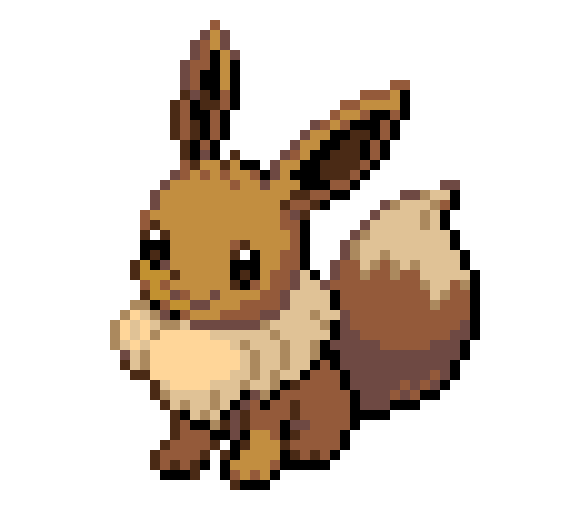

In [41]:
my_index_endpoint = aiplatform.MatchingEngineIndexEndpoint('projects/205512073711/locations/us-central1/indexEndpoints/3192678301852237824')
image_path = "pokemon/kisspng-eevee-pixel-art-image-eevee-pixel-art-maker-5c5ce3d4111941.94962810154959150807.png"

image_bytes = download_blob_as_bytes(bucket, image_path)
img = DisplayImage(image_bytes)
display(img)

In [36]:
from PIL import Image as PILImage
import io

image = Image.load_from_file(
    f"gs://{bucket}/{image_path}"
)

deployed_index_id = "pokemon_index_deployed_10081738"

embeddings = mm_embed_model.get_embeddings(
     image=image,
     dimension=1408,
)

response = my_index_endpoint.find_neighbors(
    deployed_index_id=deployed_index_id,
    queries=[embeddings.image_embedding],
    num_neighbors=9,
)

pilImages = []
for resp in response:
  for neighbor in resp:
    print(f"{neighbor.id}: {neighbor.distance}")

    image_bytes = download_blob_as_bytes(bucket, neighbor.id)
    pilImg = PILImage.open(io.BytesIO(image_bytes))
    pilImages.append(pilImg)

pokemon/images/Flareon/a403f06e227940019826d96deb7274b5.jpg: 0.8289448022842407
Downloaded blob pokemon/images/Flareon/a403f06e227940019826d96deb7274b5.jpg from bucket jkwng-vertex-experiments as bytes
pokemon/images/Charmander/880b1e124c6a4e228895f2ca89c3bd80.jpg: 0.8207932710647583
Downloaded blob pokemon/images/Charmander/880b1e124c6a4e228895f2ca89c3bd80.jpg from bucket jkwng-vertex-experiments as bytes
pokemon/images/Eevee/3.jpg: 0.8198447227478027
Downloaded blob pokemon/images/Eevee/3.jpg from bucket jkwng-vertex-experiments as bytes
pokemon/images/Eevee/6e7a28d25d9b4ad7b4cbbf12bed86c74.jpg: 0.8180825114250183
Downloaded blob pokemon/images/Eevee/6e7a28d25d9b4ad7b4cbbf12bed86c74.jpg from bucket jkwng-vertex-experiments as bytes
pokemon/images/Eevee/382be572a9b743fea3c07d6f70d9de8d.jpg: 0.816301167011261
Downloaded blob pokemon/images/Eevee/382be572a9b743fea3c07d6f70d9de8d.jpg from bucket jkwng-vertex-experiments as bytes
pokemon/images/Flareon/23f57c80ee784b63b23e4cea6cd6f454.jpg

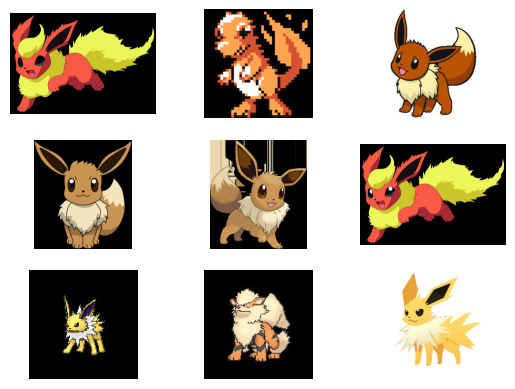

In [39]:
import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
import numpy as np

for i, pilImg in enumerate(pilImages):
  # pilImg.show()

  plt.subplot(int(len(pilImages) / 3), 3, i + 1)
  plt.imshow(np.asarray(pilImg))

  plt.axis('off')

# Model Garden

# Deploy from Huggingface

Llama 2 (via Vertex AI Model Garden)

In [ ]:
endpoint_name = "5070083411163480064"
aip_endpoint_name = (
     f"projects/{PROJECT_ID}/locations/{REGION}/endpoints/{endpoint_name}"
)
endpoint = aiplatform.Endpoint(aip_endpoint_name)

In [ ]:
# Overides max_tokens and top_k parameters during inferences.
# If you encounter the issue like `ServiceUnavailable: 503 Took too long to respond when processing`,
# you can reduce the max length, such as set max_tokens as 20.
instances = [
    {
        "prompt": f"### Human: {prompt}### Assistant: ",
        "max_tokens": max_tokens,
        "temperature": temperature,
        "top_p": top_p,
        "top_k": top_k,
    },
]
response = endpoint.predict(instances=instances)

for prediction in response.predictions:
    print(prediction)

Prompt:
### Human: How would the Future of AI in 10 Years look?### Assistant:
Output:
The future of AI in 10 years is expected to be shaped by several factors, including advancements in technology, societal needs, and ethical considerations. Here are some potential trends and developments that could shape the future of AI:
1. Increased Adoption: AI is likely to become more ubiquitous in various industries such as healthcare, finance, education, and transportation. As the technology improves, more businesses and organizations are likely to adopt AI solutions to streamline processes, improve efficiency, and reduce costs.
2


Llama 2 (via Huggingface)

In [ ]:
endpoint_name = "4207644082522030080"
aip_endpoint_name = (
     f"projects/{PROJECT_ID}/locations/{REGION}/endpoints/{endpoint_name}"
)
endpoint = aiplatform.Endpoint(aip_endpoint_name)

In [ ]:
# Overides max_tokens and top_k parameters during inferences.
# If you encounter the issue like `ServiceUnavailable: 503 Took too long to respond when processing`,
# you can reduce the max length, such as set max_tokens as 20.
instances = [
    {
        "inputs": f"{prompt}",
        "parameters": {
            "max_new_tokens": max_tokens,
            "temperature": temperature,
            "top_p": top_p,
            "top_k": top_k,
        }
    },
]
response = endpoint.predict(instances=instances)

for prediction in response.predictions:
    print(prediction)



By 2030, AI is expected to have transformed all aspects of society, from healthcare to education to transportation to entertainment. Here are some potential changes and advancements in AI technology over the next 10 years:

1. Solid advancements: AI will improve significantly, making it possible to automate more complex tasks. As a result, there will be more augmentation, and less human intervention, which will lead to increased productivity, efficiency, and accuracy.
2. Expansion of AI applications: AI will be used in various indust


Fine Tuned Llama 2 (from Vertex AI Pipelines)

In [ ]:
endpoint_name = "7770695075213869056"
aip_endpoint_name = (
     f"projects/{PROJECT_ID}/locations/{REGION}/endpoints/{endpoint_name}"
)
endpoint = aiplatform.Endpoint(aip_endpoint_name)

In [ ]:
# Overides max_tokens and top_k parameters during inferences.
# If you encounter the issue like `ServiceUnavailable: 503 Took too long to respond when processing`,
# you can reduce the max length, such as set max_tokens as 20.
instances = [
    {
        "prompt": f"### Human: {prompt}### Assistant: ",
        "max_tokens": max_tokens,
        "temperature": temperature,
        "top_p": top_p,
        "top_k": top_k,
    },
]
response = endpoint.predict(instances=instances)

for prediction in response.predictions:
    print(prediction)

Prompt:
### Human: How would the Future of AI in 10 Years look?### Assistant:
Output:
10 years is a long time in the world of technology, and AI is constantly evolving and changing. Here are some potential trends and developments that could shape the future of AI in the next decade:

1. More advanced AI models: As AI technology continues to advance, we can expect to see more sophisticated and powerful AI models that can perform more complex tasks. These models may be able to understand and generate natural language, recognize and interpret images and videos, and even make decisions based on complex data sets.

2. AI in the cloud: As A
